<a href="https://colab.research.google.com/github/suhanpark/LotteryNumberPicker/blob/master/megamillions_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import itertools

In [93]:
# data scraping

def get_source(link): #html to lxml
  website = requests.get(link).text 
  source = BeautifulSoup(website, "lxml") # lxml for fast large data processing
  return source


def get_numbers(source, numbers): # scraping and appending to a list of past winning numbers
  numbers_src = source.find_all("li", class_="ball")
  for number in numbers_src:
    numbers.append(int(number.text.split()[0]))
  

def get_mega_multiplier(source, bonus_holder): # scraping and appending to a list of past multipliers
	bonus_src = source.find_all("li", class_="mega-ball")
	for mm in bonus_src:
		bonus_holder.append(int(mm.text.split()[0]))
  

def get_rewards(): # make a list of winning rewards
  src = get_source("https://www.megamillions.com/jackpot-history")
  reward_src = src.find_all("div", class_ = "module historyLists")[0].text.split()
  index = reward_src.index("2017")
  rewards = []
  for item in reward_src[:index]:
    if item[0] == "$":
      try:
        rewards.append(int(item[1:]))
      except ValueError: # when the reward ≤ a billion
        rewards.append(int(float(item[1:])*1000))
  return rewards


current_year = int(str(datetime.now())[:4]) 

numbers = []
mults = []
rewards = np.array(get_rewards())

for year in range(2018, current_year + 1): # the lottery format changed since the end of 2017, so start from 2018 to current year
  link = "https://www.lottery.net/mega-millions/numbers/" + str(year)
  src = get_source(link)
  get_numbers(src, numbers)
  get_mega_multiplier(src, mults)


In [94]:
print(numbers)
print(len(numbers))
print(mults)
print(len(mults))
print(rewards)

[9, 10, 25, 37, 38, 2, 8, 42, 43, 50, 10, 13, 61, 62, 70, 13, 22, 32, 60, 69, 5, 22, 26, 43, 49, 4, 38, 39, 54, 59, 4, 10, 20, 33, 57, 28, 31, 41, 42, 50, 25, 28, 40, 43, 63, 12, 24, 37, 42, 57, 7, 10, 30, 33, 59, 10, 16, 31, 42, 66, 33, 36, 63, 68, 69, 34, 46, 57, 65, 69, 8, 14, 27, 57, 67, 28, 34, 37, 56, 69, 3, 23, 28, 46, 62, 20, 31, 39, 46, 49, 1, 28, 61, 62, 63, 5, 28, 62, 65, 70, 15, 23, 53, 65, 70, 3, 45, 49, 61, 69, 4, 24, 46, 61, 70, 20, 22, 39, 54, 60, 27, 28, 32, 41, 69, 2, 22, 29, 31, 34, 39, 45, 52, 56, 59, 8, 16, 32, 48, 61, 1, 2, 11, 52, 64, 31, 32, 43, 63, 68, 23, 30, 40, 43, 66, 15, 30, 51, 62, 67, 8, 10, 41, 54, 68, 2, 7, 25, 35, 44, 7, 18, 29, 32, 45, 3, 20, 33, 34, 41, 1, 6, 13, 18, 49, 14, 16, 19, 38, 57, 1, 31, 32, 47, 56, 11, 26, 44, 45, 46, 1, 3, 12, 22, 42, 2, 13, 15, 21, 62, 9, 28, 30, 54, 60, 12, 15, 35, 64, 69, 1, 32, 40, 49, 63, 1, 2, 4, 19, 29, 1, 14, 30, 44, 62, 40, 41, 61, 66, 67, 21, 22, 39, 59, 68, 1, 17, 28, 56, 70, 2, 10, 46, 50, 56, 13, 35, 45, 49,

In [95]:
import numpy as np

past_numbers_rows = np.array(numbers).reshape(int(1835/5), 5) # 5 columns, separated each winning combinations by row
past_mms_rows = np.array(mults)

num_count = len(past_numbers_rows)
mm_count = len(past_mms_rows)

print(past_numbers_rows)
#print(past_mms_rows)
print(num_count, " ", mm_count)

[[ 9 10 25 37 38]
 [ 2  8 42 43 50]
 [10 13 61 62 70]
 ...
 [ 3  6 16 18 58]
 [20 43 51 55 57]
 [ 8 24 53 68 69]]
367   367


In [96]:
"""
  since the numbers of the balls do not have any meaning, the winning numbers are categorical data. 
  so we have to convert this data into data that are easier to process
"""

import numpy as np

def encode(numbers): # one-hot encoding
    encoded = np.zeros(70) # 70 0s
    for i in range(5): # repeat for 5 numbers
        encoded[int(numbers[i])-1] = 1 # index conversion
    return encoded


def decode(encoded): # encoded to numbers
    numbers = []
    for i in range(len(encoded)):
        if encoded[i] == 1.0: # if it's 1.0 then add it to the return value because of index conversion
            numbers.append(i+1)
    return numbers

In [97]:
num_rows = past_numbers_rows[:, 0:5] # each row
encoded_list = list(map(encode, num_rows)) #encode each row

x_samples = encoded_list[0:num_count-1] # first term winning numbers
y_samples = encoded_list[1:num_count] # next winning numbers

print("encoded_list") # encoding check
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

print("numbers") # decoding check
print("X[0]: " + str(decode(x_samples[0])))
print("Y[0]: " + str(decode(y_samples[0])))

encoded_list
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y[0]: [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
numbers
X[0]: [9, 10, 25, 37, 38]
Y[0]: [2, 8, 42, 43, 50]


In [98]:
train_idx = (0, 200)
val_idx = (201, 300)
test_idx = (301, len(x_samples))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx)) #training, validation, testing set

train: (0, 200), val: (201, 300), test: (301, 366)


In [99]:
"""
  assume the previous number combination will affect the next number combinations
  so the model is LSTM (RNN)
  and since the answers = next number combinations, supervised learning
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# define model
model = keras.Sequential([
    keras.layers.LSTM(100, batch_input_shape=(1, 1, 70), return_sequences=False, stateful=True),
    keras.layers.Dense(70, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# variable to record loss annd accuracy of training and validation in each epoch\

train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 100 epoch max
for epoch in range(100):

    model.reset_states() # each epoch starts from the first winning numbers so it requires status reset

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 70)
        ys = y_samples[i].reshape(1, 70)
        
        loss, acc = model.train_on_batch(xs, ys) # training model by the amount of batch

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 70)
        ys = y_samples[i].reshape(1, 70)
        
        loss, acc = model.test_on_batch(xs, ys) # compare the output with correct results
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))


epoch    0 train acc 0.050 loss 0.327 val acc 0.010 loss 0.263
epoch    1 train acc 0.045 loss 0.266 val acc 0.010 loss 0.262
epoch    2 train acc 0.040 loss 0.262 val acc 0.010 loss 0.262
epoch    3 train acc 0.045 loss 0.259 val acc 0.010 loss 0.262
epoch    4 train acc 0.045 loss 0.257 val acc 0.010 loss 0.262
epoch    5 train acc 0.045 loss 0.255 val acc 0.010 loss 0.262
epoch    6 train acc 0.035 loss 0.251 val acc 0.010 loss 0.262
epoch    7 train acc 0.055 loss 0.246 val acc 0.020 loss 0.262
epoch    8 train acc 0.070 loss 0.242 val acc 0.020 loss 0.262
epoch    9 train acc 0.085 loss 0.237 val acc 0.020 loss 0.263
epoch   10 train acc 0.085 loss 0.232 val acc 0.020 loss 0.264
epoch   11 train acc 0.090 loss 0.227 val acc 0.030 loss 0.266
epoch   12 train acc 0.105 loss 0.221 val acc 0.020 loss 0.267
epoch   13 train acc 0.120 loss 0.216 val acc 0.020 loss 0.268
epoch   14 train acc 0.125 loss 0.211 val acc 0.020 loss 0.270
epoch   15 train acc 0.145 loss 0.206 val acc 0.020 los

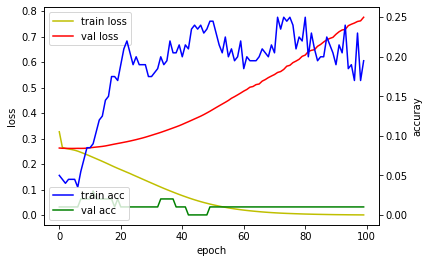

In [103]:
"""
  lottery is completely randomized and each combinations do not affect each other in reality
  so as the plot shows the number cannot be predicted even though we train models
"""

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [104]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(70):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) # numbers start from 1
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 5:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [105]:
print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 70)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    numbers.sort()
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)

receive numbers
0 : [9, 24, 27, 54, 64]
1 : [9, 24, 54, 59, 67]
2 : [3, 39, 45, 50, 54]
3 : [7, 27, 48, 49, 54]
4 : [11, 30, 38, 41, 52]
5 : [24, 28, 42, 55, 64]
6 : [17, 24, 27, 48, 54]
7 : [1, 17, 30, 51, 59]
8 : [19, 43, 48, 54, 63]
9 : [25, 38, 48, 54, 65]
